# Progressive metal band classification
### This project is part of the Machine Learning course. The goal is to make a classifier that can predict progressive metal bands based on a 10 second riff (without voice). The progressive bands that were examined are 5. Details of the modelling procedure and code are below. Also there are imports from the scripts in the same folder. 

## Step 1 : Import the necessary modules

In [1]:
import pandas as pd
import os
import librosa
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pickle
from pyaudio_features import *
from plots import plot_wav
from pyaudio_features import *
from feature_selection import *
from models import *

warnings.simplefilter('ignore')

## Step 2 : Data Importing
### The raw data that consists of the riffs were created manually. For each band a total of 50 songs were extracted as URLs from youtube. From the URLs, wavs were obtained. Each wav (song) was then imported into a trimming software. In this software, 10+ seconds riff were extracted from the wavs in parts were there was heavy riffs without voice. 
### We use data_import function pyaudio_features.py to get the path of each wav file and also the labels that consists of the 5 bands

In [2]:
# Import the wav files and extract the classification labels
wavs, labels = data_import('..\\raw_data')
# Path files
print('---Path to Wav files for each band---')
print()
wavs[5:250:25]

---Path to Wav files for each band---



['..\\raw_data\\Dream_Theater\\A dramatic turn of events\\Outcry_riff.wav',
 '..\\raw_data\\Dream_Theater\\Metropolis_Part_2\\Strange Déjà Vu_riff.wav',
 '..\\raw_data\\Gojira\\Fortitude\\Gojira - New Found_riff.wav',
 '..\\raw_data\\Gojira\\Terra_incognita\\Clone_riff.wav',
 '..\\raw_data\\Mastodon\\Blood Mountain\\Siberian Divide_riff.wav',
 '..\\raw_data\\Mastodon\\Leviathan\\MASTODON - ＂Iron Tusk＂ (Official HD Music Video)_riff.wav',
 '..\\raw_data\\Opeth\\Blackwater_Park\\Opeth - The Leper Affinity_riff.wav',
 '..\\raw_data\\Opeth\\Orchid\\Forest Of October_riff_final.wav',
 '..\\raw_data\\Symphony X\\Odyssey\\Wicked_riff.wav',
 '..\\raw_data\\Symphony X\\The_Divine_Wings_Of_Tragedy\\The_Eyes_of_Medusa_riff.wav']

### Visualizing the information of the path to wav files

In [3]:
print('Path format = ', wavs[5],'\n')

file_path_example = wavs[5]
path_components = file_path_example.split(os.sep)

# Extract the relevant information
band = path_components[-3]
album = path_components[-2]
song = path_components[-1].replace('_riff.wav','')

print("Band name:", band, '\n')
print("Album:", album, '\n')
print("Song:", song, '\n')

Path format =  ..\raw_data\Dream_Theater\A dramatic turn of events\Outcry_riff.wav 

Band name: Dream_Theater 

Album: A dramatic turn of events 

Song: Outcry 



In [4]:
# See classification labels
print(set(labels))

{'Symphony X', 'Dream_Theater', 'Gojira', 'Opeth', 'Mastodon'}


### Each class is balanced, containing 50 riffs

In [5]:
print(f"Total Data is {len(wavs)} riffs \n")
print(f"Total Dream_Theater riffs = {labels.count('Dream_Theater')} \n")
print(f"Total Gojira riffs = {labels.count('Gojira')} \n") 
print(f"Total Mastodon riffs = {labels.count('Mastodon')} \n")
print(f"Total Opeth riffs = {labels.count('Opeth')} \n")
print(f"Total Symphony_X riffs = {labels.count('Symphony X')} \n")

Total Data is 250 riffs 

Total Dream_Theater riffs = 50 

Total Gojira riffs = 50 

Total Mastodon riffs = 50 

Total Opeth riffs = 50 

Total Symphony_X riffs = 50 



## Step 3: Trim riffs to 10 second each
### The wavs that were exported from the software were mostly 10+ seconds. We want to have the same time for each riff, so all instances can be equally represented.
### Goal is to set all audio length to 10 seconds.

In [6]:
for wav in wavs[:10]:
    y, _ = librosa.load(wav)
    duration = librosa.get_duration(y=y, sr = 22050)
    print(f"Audio duration = {duration:.3f} seconds")

Audio duration = 12.658 seconds
Audio duration = 12.400 seconds
Audio duration = 18.635 seconds
Audio duration = 14.851 seconds
Audio duration = 14.021 seconds
Audio duration = 11.601 seconds
Audio duration = 13.204 seconds
Audio duration = 11.141 seconds
Audio duration = 13.396 seconds
Audio duration = 13.870 seconds


### There are very few instances with riffs less than 10 seconds and we leave them as they are
### Using trim_wav function from pyaudio_features.py to set each instance wav to a maximum of 10 seconds.

In [7]:
y = trim_wav(wavs)
for aud in y[:1000]:
    duration = librosa.get_duration(y=aud, sr = 22050)
    print(f"Audio duration = {duration:.3f} seconds")

Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio du

### Checking some waveforms for the different classes
### Using plot_wav function from plots.py

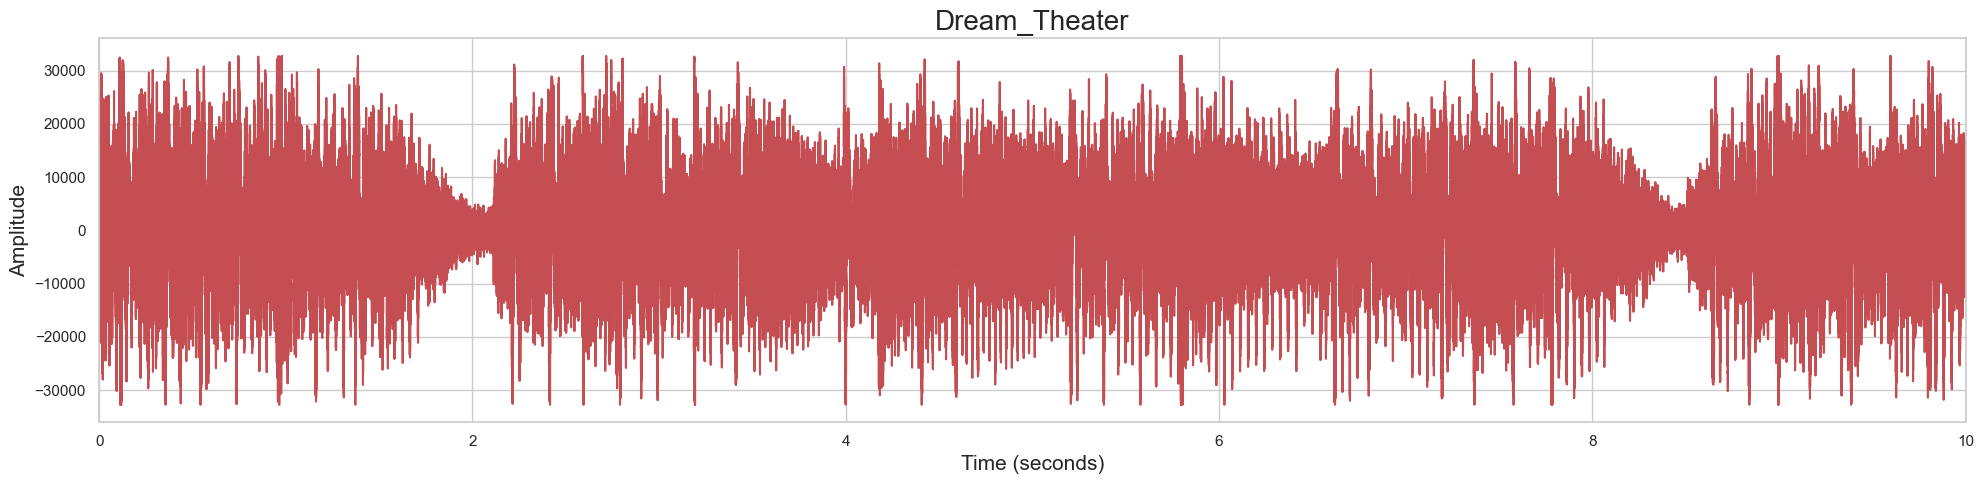

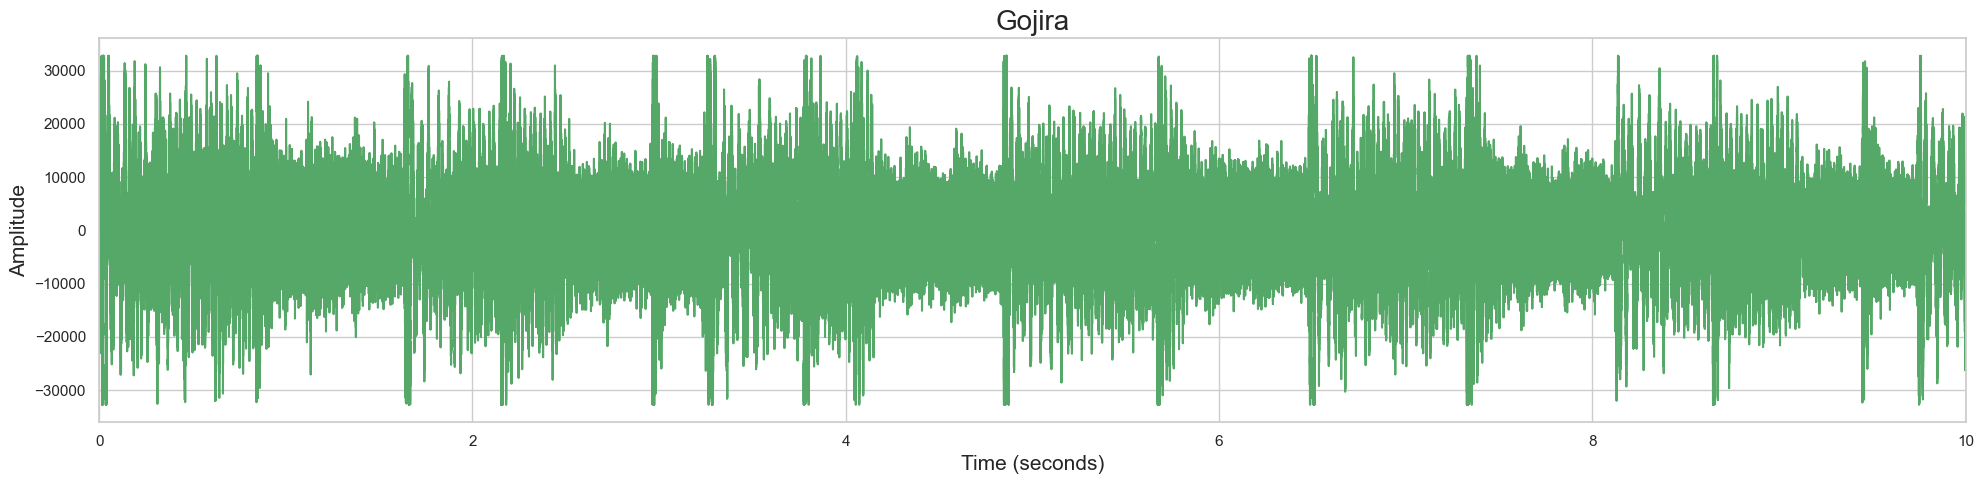

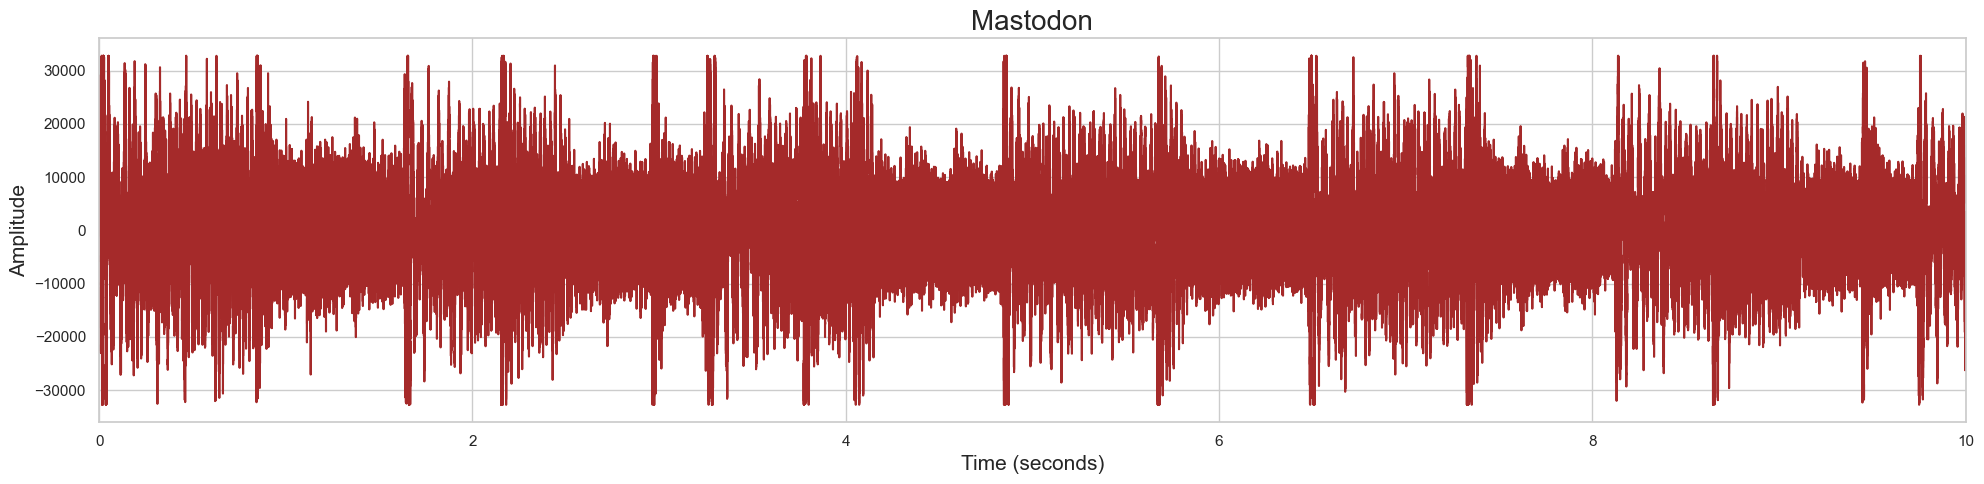

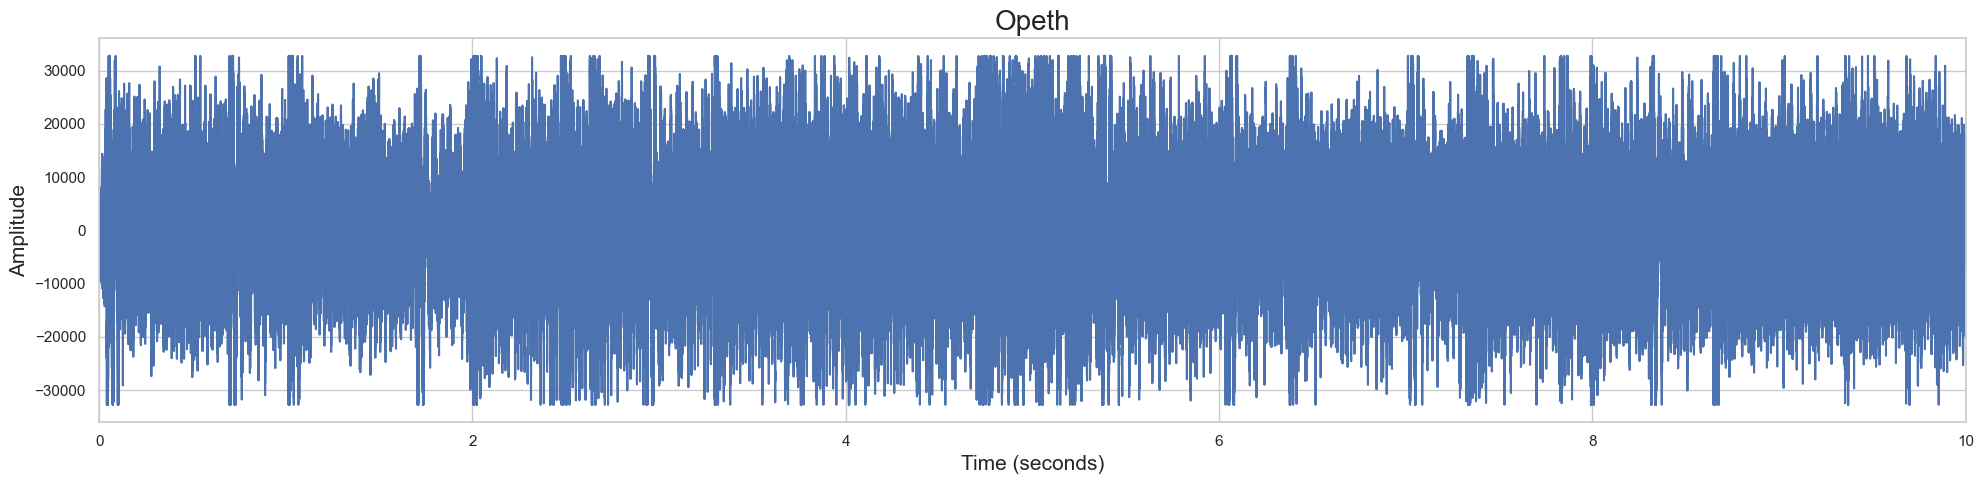

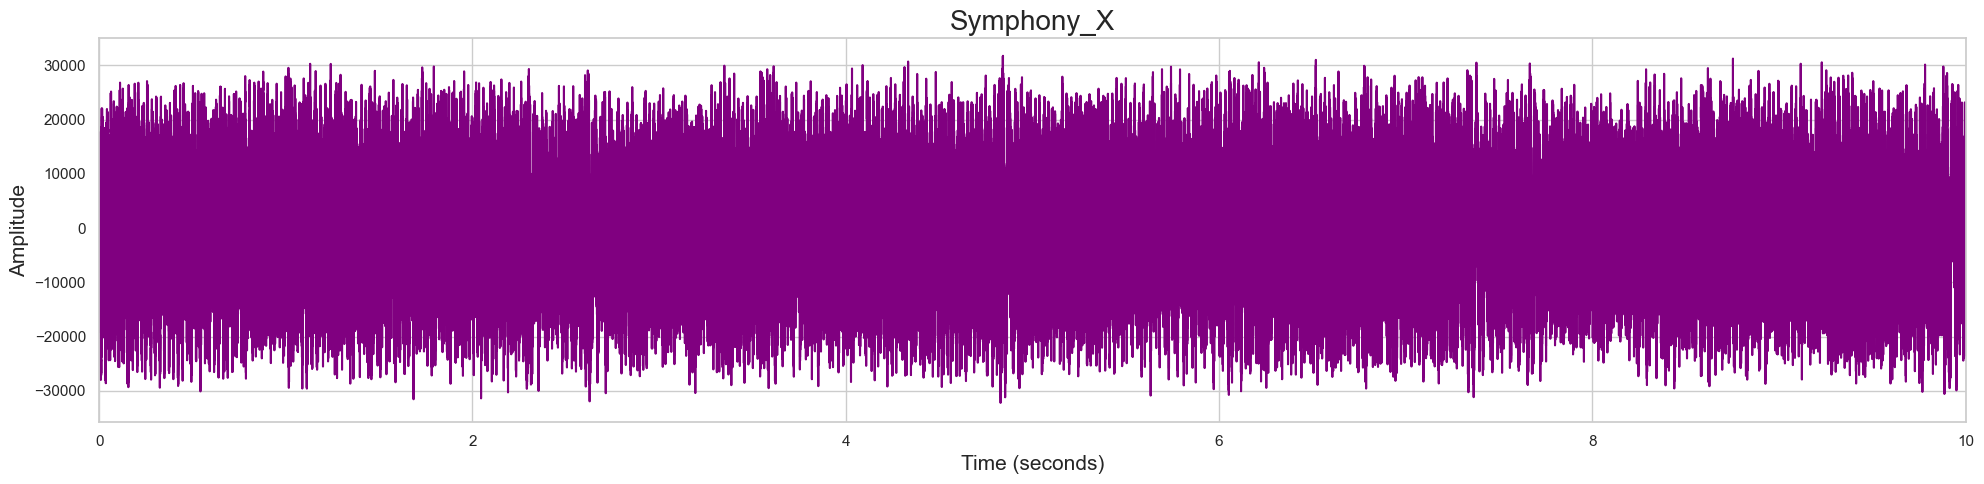

In [8]:
band_0 = wavs[0]
band_1 = wavs[52]
band_2 = wavs[101]
band_3 = wavs[151]
band_4 = wavs[201]

plot_wav(band_0,'Dream_Theater',color='r')
plot_wav(band_1,'Gojira',color='g')
plot_wav(band_1,'Mastodon',color='brown')
plot_wav(band_2,'Opeth',color='b')
plot_wav(band_3,'Symphony_X',color='purple')

## Step 4: Feature Extraction
### Using pyaudioanalysis to exctract short-term features. The short term window that was selected is 150ms. After all the short term window features were created for each instance, the feature vector was obtained. The feature vector consists of those features mean and standard deviation. Delta features were not computed, thus the total number of features is 68.
### pyaudio_featurize function is used that leverage PyAudioAnalysis for feature extraction

In [9]:
dataframe = pyaudio_featurize(y)

In [10]:
print("Dataframe")
dataframe.head()

Dataframe


,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,mfcc_1_mean,mfcc_2_mean,...,chroma_4_std,chroma_5_std,chroma_6_std,chroma_7_std,chroma_8_std,chroma_9_std,chroma_10_std,chroma_11_std,chroma_12_std,chroma_std_std
0,0.105710,0.055723,3.053597,0.217957,0.239820,0.695104,0.001577,0.109814,-20.855312,1.911188,...,0.020500,0.023022,0.048237,0.020475,0.004242,0.010564,0.020596,0.024043,0.028570,0.012721
1,0.099929,0.051860,2.945046,0.219332,0.243923,0.628016,0.001475,0.092321,-20.900489,2.061422,...,0.028510,0.020633,0.027283,0.020706,0.009939,0.015449,0.015218,0.015593,0.016117,0.007320
2,0.122507,0.040403,3.044921,0.234820,0.237650,0.940604,0.001130,0.182423,-20.776285,1.757447,...,0.032048,0.017558,0.030603,0.030377,0.006564,0.015826,0.019248,0.009005,0.015578,0.010417
3,0.097158,0.055385,2.993176,0.219220,0.243528,0.575079,0.002444,0.090808,-21.935915,1.985577,...,0.032101,0.013873,0.016878,0.060114,0.012134,0.016142,0.042783,0.025086,0.018946,0.017509
4,0.101324,0.056167,2.986543,0.219075,0.236040,0.705186,0.001545,0.113600,-20.841324,1.879387,...,0.030614,0.013210,0.042830,0.019760,0.015664,0.032382,0.015143,0.014545,0.022569,0.011041


In [11]:
pd.set_option('display.max_columns', None)
print(f'Total features of the dataset = {len(dataframe.columns)} \n')
print(dataframe.columns)

Total features of the dataset = 68 

Index(['zcr_mean', 'energy_mean', 'energy_entropy_mean',
       'spectral_centroid_mean', 'spectral_spread_mean',
       'spectral_entropy_mean', 'spectral_flux_mean', 'spectral_rolloff_mean',
       'mfcc_1_mean', 'mfcc_2_mean', 'mfcc_3_mean', 'mfcc_4_mean',
       'mfcc_5_mean', 'mfcc_6_mean', 'mfcc_7_mean', 'mfcc_8_mean',
       'mfcc_9_mean', 'mfcc_10_mean', 'mfcc_11_mean', 'mfcc_12_mean',
       'mfcc_13_mean', 'chroma_1_mean', 'chroma_2_mean', 'chroma_3_mean',
       'chroma_4_mean', 'chroma_5_mean', 'chroma_6_mean', 'chroma_7_mean',
       'chroma_8_mean', 'chroma_9_mean', 'chroma_10_mean', 'chroma_11_mean',
       'chroma_12_mean', 'chroma_std_mean', 'zcr_std', 'energy_std',
       'energy_entropy_std', 'spectral_centroid_std', 'spectral_spread_std',
       'spectral_entropy_std', 'spectral_flux_std', 'spectral_rolloff_std',
       'mfcc_1_std', 'mfcc_2_std', 'mfcc_3_std', 'mfcc_4_std', 'mfcc_5_std',
       'mfcc_6_std', 'mfcc_7_std', 'mfcc_

## Step 5: Insert the labels into the dataframe
### Label encoding is necessary to convert strings to integers for the classification procedure. The labels are automatically assigned as Dream_Theater = 0, Opeth = 1, Gojira = 2, Symphony_X = 3, Mastodon = 4.

In [12]:
merge_labels(dataframe,labels)
dataframe['Band']

0      0
1      0
2      0
3      0
4      0
      ..
245    4
246    4
247    4
248    4
249    4
Name: Band, Length: 250, dtype: int64

In [13]:
dataframe.to_csv('../clean_data/cleaned_dataset',index=False)

## Step 6: Feature selection
### We use pearson corellation between each feature and create heatmap to inspect if some features have high corellation

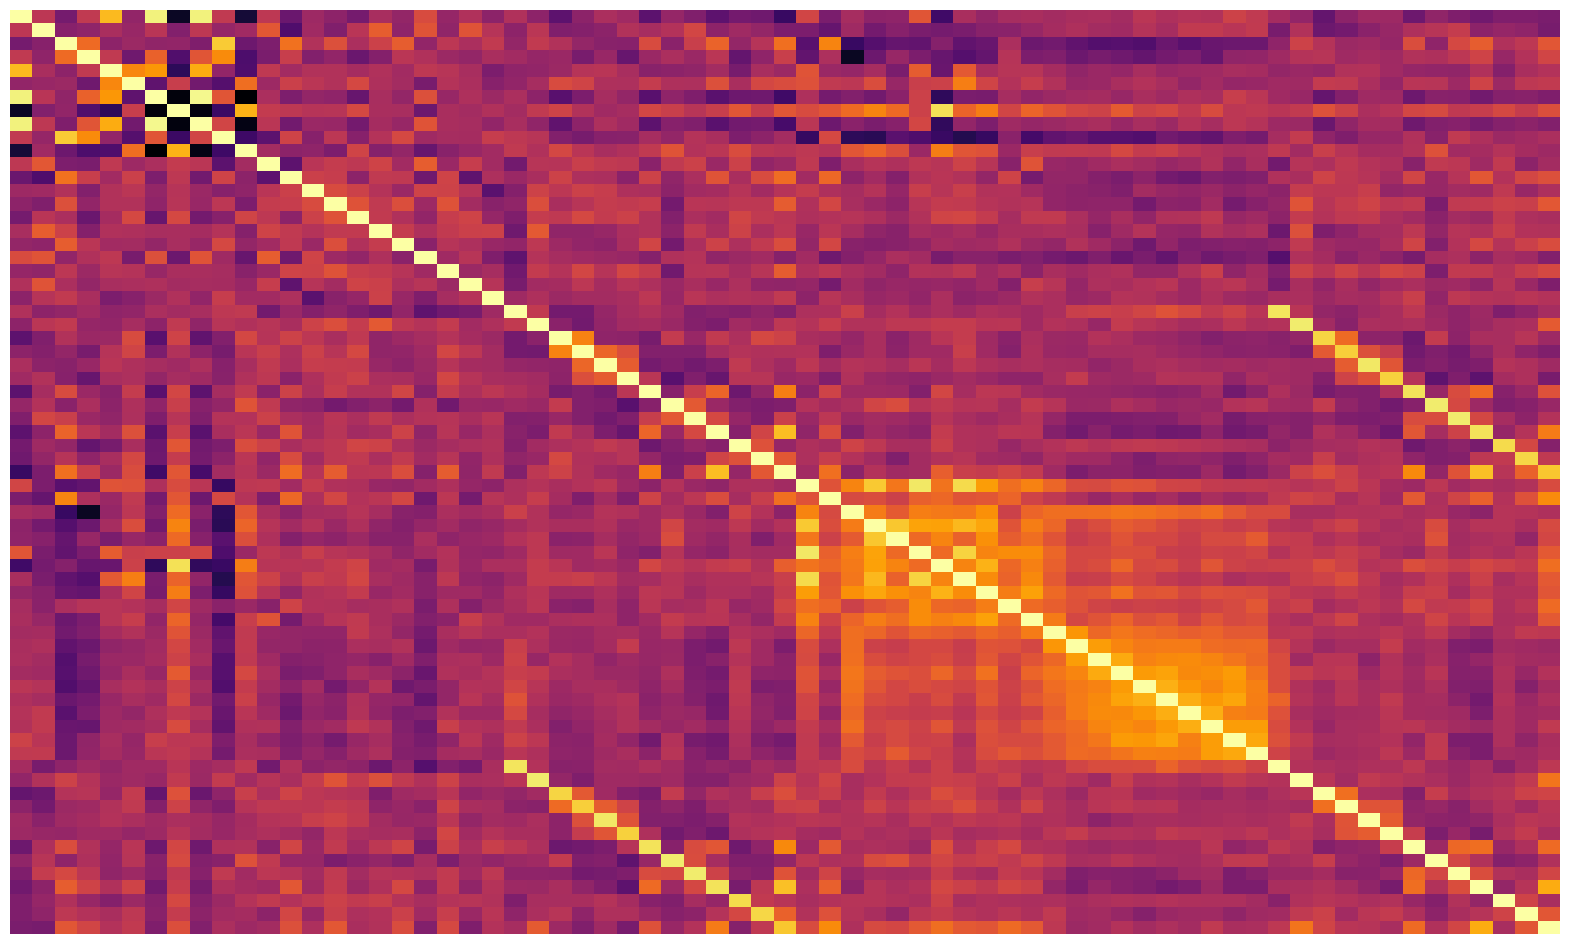

In [14]:
plt.figure(figsize=(20, 12))
sns.heatmap(dataframe.corr(), annot=False, cbar=False, cmap='inferno', xticklabels=False, yticklabels=False)
plt.show()

### Visualy its hard to see the exact correlated features but there are some correlation according to the above heatmap. For that reason we use correlation_drop function. We use an absolute correlation threshold in which we delete the first of a pair of two features that have correlation > threshold.Threshold selected is 0.8.

In [15]:
new_dataframe , ff, pairs = features_corellation(dataframe,0.8)
print('Correlation of features with corellation > threshold \n')
print('From those features we delete automatically the first one using corellation_drop function \n')
pairs

Correlation of features with corellation > threshold 

From those features we delete automatically the first one using corellation_drop function 



[['spectral_entropy_mean', 'zcr_mean', 0.9243795501982204],
 ['spectral_rolloff_mean', 'zcr_mean', 0.9243476787553666],
 ['spectral_rolloff_mean', 'spectral_entropy_mean', 0.957636571966897],
 ['mfcc_2_mean', 'spectral_entropy_mean', -0.8068221808974781],
 ['spectral_entropy_std', 'zcr_std', 0.8826604958303237],
 ['spectral_flux_std', 'spectral_flux_mean', 0.8526133671718349],
 ['spectral_rolloff_std', 'zcr_std', 0.8347772647646828],
 ['spectral_rolloff_std', 'spectral_entropy_std', 0.8031056459190777],
 ['chroma_1_std', 'chroma_1_mean', 0.8696768277227879],
 ['chroma_2_std', 'chroma_2_mean', 0.8955334724887722],
 ['chroma_3_std', 'chroma_3_mean', 0.8102522563309277],
 ['chroma_5_std', 'chroma_5_mean', 0.8840926298430034],
 ['chroma_7_std', 'chroma_7_mean', 0.8657607947573557],
 ['chroma_8_std', 'chroma_8_mean', 0.9010377296052958],
 ['chroma_9_std', 'chroma_9_mean', 0.8962968523313005],
 ['chroma_10_std', 'chroma_10_mean', 0.8645558683873973],
 ['chroma_11_std', 'chroma_11_mean', 0.83

In [16]:
new_dataframe.head()

,zcr_mean,Band,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_flux_mean,mfcc_1_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,mfcc_10_mean,mfcc_11_mean,mfcc_12_mean,mfcc_13_mean,chroma_1_mean,chroma_2_mean,chroma_3_mean,chroma_4_mean,chroma_5_mean,chroma_6_mean,chroma_7_mean,chroma_8_mean,chroma_9_mean,chroma_10_mean,chroma_11_mean,chroma_12_mean,chroma_std_mean,zcr_std,energy_std,energy_entropy_std,spectral_centroid_std,spectral_spread_std,mfcc_1_std,mfcc_2_std,mfcc_3_std,mfcc_4_std,mfcc_5_std,mfcc_6_std,mfcc_7_std,mfcc_8_std,mfcc_9_std,mfcc_10_std,mfcc_11_std,mfcc_12_std,mfcc_13_std,chroma_4_std,chroma_6_std,chroma_std_std
0,0.105710,0,0.055723,3.053597,0.217957,0.239820,0.001577,-20.855312,0.689290,0.310360,0.247771,0.311440,-0.004708,0.040125,0.119924,0.121784,-0.040761,-0.078257,-0.103940,0.006184,0.048000,0.030567,0.024040,0.017757,0.047634,0.027500,0.004472,0.015524,0.028602,0.029448,0.047676,0.027775,0.046415,0.018616,0.236496,0.038130,0.019121,0.821244,0.213537,0.162664,0.155529,0.208331,0.143799,0.158900,0.159355,0.198779,0.179035,0.125585,0.107434,0.121511,0.020500,0.048237,0.012721
1,0.099929,0,0.051860,2.945046,0.219332,0.243923,0.001475,-20.900489,0.749093,0.208474,0.230945,0.280070,0.071075,-0.011910,0.002708,0.153257,-0.004456,-0.036992,-0.036150,0.006132,0.029351,0.044857,0.051543,0.018777,0.044813,0.038247,0.010134,0.021579,0.026326,0.021359,0.031234,0.022755,0.029489,0.012548,0.172613,0.028125,0.014122,0.403264,0.172702,0.163877,0.120093,0.183415,0.161246,0.118857,0.108775,0.174875,0.137793,0.125061,0.134901,0.101303,0.028510,0.027283,0.007320
2,0.122507,0,0.040403,3.044921,0.234820,0.237650,0.001130,-20.776285,0.560723,0.144339,0.085891,0.268219,0.023865,-0.074657,0.013007,0.237970,0.044694,-0.031463,0.025445,0.007598,0.050170,0.039376,0.040709,0.015814,0.036304,0.042835,0.005642,0.018291,0.024266,0.010117,0.022493,0.026800,0.035096,0.011241,0.234121,0.040340,0.025098,0.445309,0.164966,0.211810,0.173688,0.147863,0.157013,0.155250,0.173531,0.186246,0.175517,0.142312,0.135567,0.097948,0.032048,0.030603,0.010417
3,0.097158,0,0.055385,2.993176,0.219220,0.243528,0.002444,-21.935915,0.761226,0.415212,0.427907,0.428812,0.183246,0.100648,0.115912,0.126417,-0.017742,-0.101078,-0.064828,0.003115,0.058177,0.018731,0.023820,0.009070,0.017768,0.084318,0.008890,0.016340,0.052910,0.018570,0.022190,0.033376,0.064011,0.029710,0.279367,0.062253,0.037885,2.127770,0.340068,0.268254,0.201641,0.185140,0.140079,0.224329,0.167879,0.200190,0.126455,0.147705,0.156770,0.143223,0.032101,0.016878,0.017509
4,0.101324,0,0.056167,2.986543,0.219075,0.236040,0.001545,-20.841324,0.590226,0.316569,0.397219,0.327900,-0.004786,0.049066,0.085250,0.179963,-0.031324,-0.070263,-0.034694,0.004346,0.029163,0.051249,0.044392,0.012362,0.046229,0.023632,0.013717,0.034562,0.021268,0.012134,0.026735,0.026934,0.036768,0.023873,0.307889,0.042824,0.025820,0.750608,0.299349,0.209469,0.166927,0.163716,0.185222,0.175279,0.127536,0.159826,0.150138,0.136975,0.113349,0.116015,0.030614,0.042830,0.011041


In [17]:
print(f"New data features are {len(new_dataframe.columns)}")
print(f"Number of features dropped = {len(dataframe.columns)-len(new_dataframe.columns)}")
## Save new dataset
new_dataframe.to_csv('../clean_data/corr_matrix_dataset',index=False)

New data features are 53
Number of features dropped = 16


## Step 7: Model fitting and hyperparameter tuning
### The dataset is comprised of 250 instances with 50 instances per label. Because the amount of data is low, there wasn't a dataset split of train-test. A repeated shuffle split for cross validation was conducted on the whole dataset. The train-validation ratio was 200-50. In each different split, a total of 40 riffs were used for training and 10 for testing randomly. Standard scaling was performed on train data and scaling on both train and test data.This happened 20 times and then the best model was selected based on the average f1 score over those 20 folds. Also the standard deviation and other metrics were computed. 

In [18]:
def best_metrics(params,train,test):
    print("Best model parameters")
    print(params)
    print()
    print("================Train================")
    #print(f"Training accuracy = {np.array(train[0]).mean():.3f} +- {np.array(train[0]).std():.3f}")
    print(f'Avg F1 score = {train[1]["f1_score"][0].mean():.3f} +- {train[1]["f1_score"][1].mean():.3f}')
    print()
    print("================Test================")
    #print(f"Test accuracy = {np.array(test[0]).mean():.3f} +- {np.array(test[0]).std():.3f}")
    print(f'Avg F1 score = {test[1]["f1_score"][0].mean():.3f} +- {test[1]["f1_score"][1].mean():.3f}')

### Logistic Regression

In [31]:
best_f1_lr = 0
l_scores = ['l2', 'none']
C_range = [0.01,0.1,1,10,100]
for c in C_range:
    for l in l_scores:
        model = LogisticRegression(C=c,penalty=l,max_iter=1000,random_state=42)
        train, test = cross_validate(model,new_dataframe)  
        if test[1]["f1_score"][0].mean() > best_f1_lr: # and diff < 1:
            best_f1_lr = test[1]['f1_score'][0].mean()
            best_lr = model.get_params()
            train_lr = train
            test_lr = test

In [20]:
print('Best Logistic regression results')
best_metrics(best_lr,train_lr,test_lr)

Best Logistic regression results
Best model parameters
{'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

================Train================
Avg F1 score = 0.924 +- 0.021

================Test================
Avg F1 score = 0.751 +- 0.080


In [21]:
import pickle
pickle.dump(best_lr, open('../Best_Models/LR', 'wb'))

## KNN

In [22]:
best_f1 = 0
p_range = [1,2]
k_range = range(2,15)
weights = ['uniform','distance']
for p in p_range:
    for k in k_range:
        for w in weights:
            model = KNeighborsClassifier(n_neighbors=k,p=p)
            train, test = cross_validate(model,new_dataframe)        
            if test[1]["f1_score"][0].mean() > best_f1:
                best_f1 = test[1]['f1_score'][0].mean()
                best_knn = model.get_params()
                train_knn = train
                test_knn = test

In [23]:
best_metrics(best_knn,train_knn,test_knn)

Best model parameters
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

================Train================
Avg F1 score = 0.897 +- 0.020

================Test================
Avg F1 score = 0.759 +- 0.084


In [24]:
import pickle
pickle.dump(best_knn, open('../Best_Models/KNN', 'wb'))

## SVM

In [25]:
from sklearn.svm import SVC

best_f1 = 0
kernel = ['rbf','linear','sigmoid']
C = [0.001,0.005,0.01,0.1,1,10]
for k in kernel:
    for c in C:
        model = SVC(kernel='linear',C=c,probability=True)
        train, test = cross_validate(model,new_dataframe)
        if test[1]['f1_score'][0].mean() > best_f1:# and np.array(train[0]).mean()< 0.95:
            best_f1 = test[1]['f1_score'][0].mean()
            best_svm = model.get_params()
            train_svm = train
            test_svm = test

In [26]:
best_metrics(best_svm,train_svm,test_svm)

Best model parameters
{'C': 0.01, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

================Train================
Avg F1 score = 0.846 +- 0.028

================Test================
Avg F1 score = 0.725 +- 0.096


In [27]:
import pickle
pickle.dump(best_svm, open('../Best_Models/SVM', 'wb'))

## Random Forest

In [28]:
estimators = [2,4,8,16,32,64,128]
max_depth = [3, 5, 7]
best_f1 = 0
for est in estimators:
    for de in max_depth:
        model = RandomForestClassifier(n_estimators=est,max_depth = de,random_state=42)
        train, test = cross_validate(model,new_dataframe)
        if test[1]['f1_score'][0].mean() > best_f1 and np.array(train[0]).mean()< 0.95:
            best_f1 = test[1]['f1_score'][0].mean()
            best_params = model.get_params()
            train_saved = train
            test_saved = test

In [29]:
best_metrics(best_params,train_saved,test_saved)

Best model parameters
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 128, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

================Train================
Avg F1 score = 0.921 +- 0.022

================Test================
Avg F1 score = 0.672 +- 0.118


In [30]:
pickle.dump(best_svm, open('../Best_Models/RF', 'wb'))

## Step 8: Plotting results 

In [53]:
test_lr[1]

{'precision': [array([0.73248751, 0.83623918, 0.67015942, 0.82486472, 0.78870851]),
  array([0.10077108, 0.08846261, 0.09512108, 0.09660574, 0.11140995])],
 'recall': [array([0.805, 0.82 , 0.72 , 0.725, 0.695]),
  array([0.12439855, 0.12489996, 0.08717798, 0.12990381, 0.14309088])],
 'f1_score': [array([0.75983534, 0.82140315, 0.68796578, 0.76066835, 0.7259089 ]),
  array([0.08130512, 0.08137785, 0.06193816, 0.08426133, 0.09173898])]}

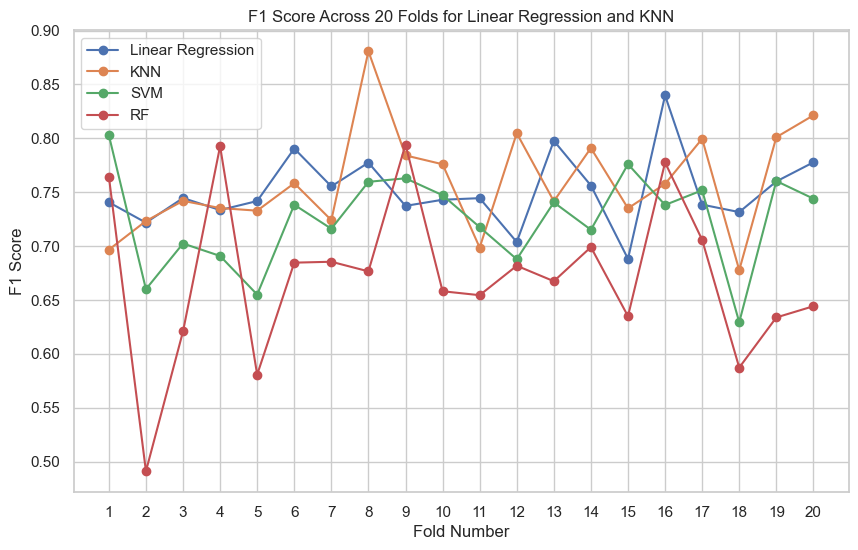

In [50]:
folds = list(range(1, 21))

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(folds, test_lr[0], marker='o', label='Linear Regression')
plt.plot(folds, test_knn[0], marker='o', label='KNN')
plt.plot(folds, test_svm[0], marker='o', label='SVM')
plt.plot(folds, test_saved[0], marker='o', label='RF')

plt.xlabel('Fold Number')
plt.ylabel('F1 Score')
plt.title('F1 Score Across 20 Folds for Linear Regression and KNN')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.show()

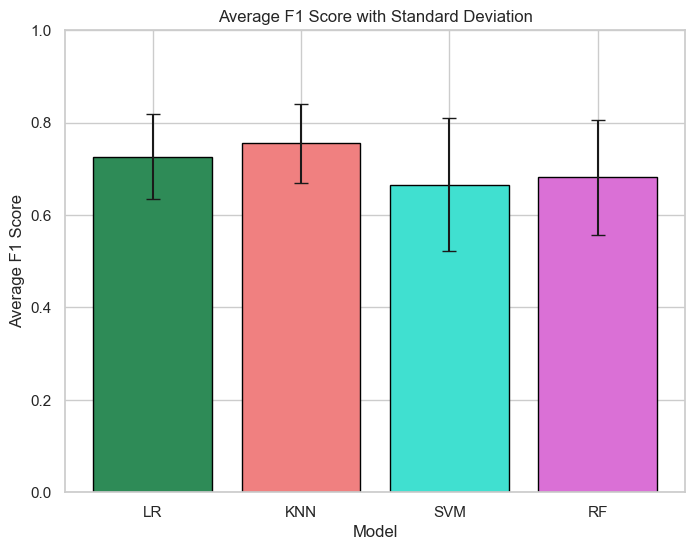

In [89]:
labels = ['LR','KNN','SVM','RF']

n = 4
avg = [test_lr[1]['f1_score'][0][n],
       test_knn[1]['f1_score'][0][n],
       test_svm[1]['f1_score'][0][n],
       test_saved[1]['f1_score'][0][n]]
std = [test_lr[1]['f1_score'][1][n], 
       test_knn[1]['f1_score'][1][n],
       test_svm[1]['f1_score'][1][n],
       test_saved[1]['f1_score'][1][n]]
plt.figure(figsize=(8, 6))
plt.bar(labels, avg, yerr=std, capsize=5, color=['seagreen', 'lightcoral','turquoise','orchid'], edgecolor='black')
plt.xlabel('Model')
plt.ylabel('Average F1 Score')
plt.title('Average F1 Score with Standard Deviation')
plt.ylim(0, 1)  # Adjust the y-axis limit to make room for error bars
plt.show()

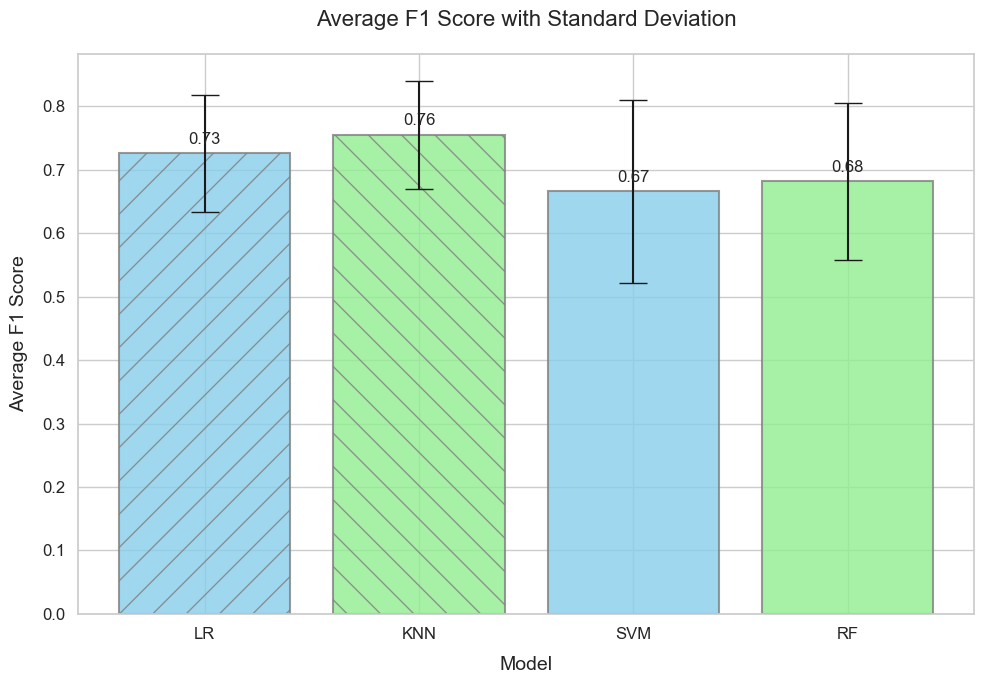

In [90]:
plt.figure(figsize=(10, 7))
bars = plt.bar(labels, avg, yerr=std, capsize=10, color=['skyblue', 'lightgreen'], edgecolor='grey', linewidth=1.5, alpha=0.8)

# Adding a pattern to the bars for better differentiation
bars[0].set_hatch('/')
bars[1].set_hatch('\\')

color=['cornflowerblue', 'mediumseagreen']
plt.xlabel('Model', fontsize=14, labelpad=10)
plt.ylabel('Average F1 Score', fontsize=14, labelpad=10)
plt.title('Average F1 Score with Standard Deviation', fontsize=16, pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.ylim(0, 1.1 * max(averages + errors))  # Adjust the y-axis limit to make room for error bars

# Adding value labels on top of each bar
for bar, avg in zip(bars, avg):
    plt.text(bar.get_x() + bar.get_width() / 2, avg + 0.01, f'{avg:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()